In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [3]:
data = pd.read_csv('Position_Salaries.csv')

In [4]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [22]:
x = data.iloc[:,1:2].values
y = data.iloc[:,2].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [23]:
reg = RandomForestRegressor()
reg.fit(x,y)

RandomForestRegressor()

In [24]:
y_pred = reg.predict(np.array([6.5]).reshape(1,1)) # predicting with different values
y_pred

array([162200.])

Above result is based on n_estimators =1 and random_state=0

# Now lets increase the number of n_estmators =100 to see y_pred result for same value

In [25]:
reg = RandomForestRegressor(n_estimators=100,random_state=1)
reg.fit(x,y)

RandomForestRegressor(random_state=1)

In [26]:
y_pred = reg.predict(np.array([6.5]).reshape(1,1))
y_pred

array([165500.])

# Now lets increase the number of n_estmators =300 to see y_pred result for same value

In [27]:
reg = RandomForestRegressor(n_estimators=300,random_state=0)
reg.fit(x,y)

RandomForestRegressor(n_estimators=300, random_state=0)

In [28]:
y_pred = reg.predict(np.array([6.5]).reshape(1,1))
y_pred

array([160333.33333333])

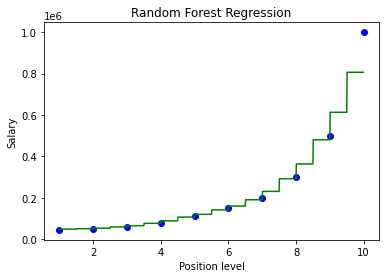

In [29]:
# Visualising the Random Forest Regression results
  
# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, reg.predict(X_grid),color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
rf_accuracy = reg.score(X_grid,reg.predict(X_grid))
rf_accuracy

1.0